In [38]:
import pandas as pd
pd.options.display.max_columns=1000
pd.options.display.width=200
pd.options.display.min_rows=60
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.patches import Rectangle
import seaborn as sns
plt.style.use('bmh')

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from datetime import datetime
# import custom functions from hyperparamfuncs.py
from hyperparamfuncs import *

- In terms of analyzing the results of models, the BOW approach is the easiest to understand because no dimensionality reduction methods were applied.
- The features are simply words (or tokens) in user reviews
- Therefore, we can analyze feature importances or coefficient values to understand which words are important in predicting the sentiment

In [20]:
# first look at the model that includes all of the tokens as features - BOW approach
# import BOW data 
bow_data = preprocess_data(pd.read_pickle('data/review_1pct_bus_bow_x_train.pkl'))
# import hyperparameter table
hyp_data = pd.read_pickle('data/hyperparameter_tables/bow_hyperparameter_table20200528_01:05:58.pkl')
# Look at the top features 
feat_names = list(bow_data.columns)
feat_import = hyp_data.iloc[0]['feature_importances'][0]
df_importances = pd.DataFrame({'feat_names': feat_names, 
                              'feat_import': feat_import})
ranked = df_importances.iloc[(-np.abs(df_importances['feat_import'].values)).argsort()]
ranked.set_index('feat_names', inplace=True)
ranked.head(20)

/home/gksullan/Documents/Springboard/Capstone_Project_2/hyperparamfuncs.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, inplace=True)


,feat_import
feat_names,
amazing,6.968584
delicious,6.757779
disappointed,-6.718392
rude,-6.626816
bland,-6.144193
terrible,-5.926007
disappointing,-5.873168
awesome,5.834838
perfect,5.775000


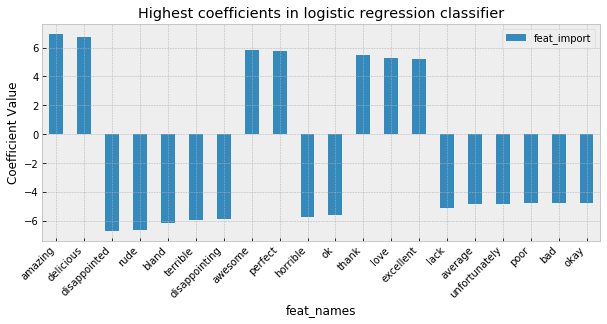

In [22]:
# plot the top features by coefficient value
_ = ranked[0:20].plot(kind='bar', figsize=(10,4))
_ = plt.ylabel('Coefficient Value')
_ = plt.xticks(rotation=45, ha='right')
_ = plt.title('Highest coefficients in logistic regression classifier')

- Analyzing the bar chart of coefficient values, we can clearly distinguish negative words from positive words. 
- Words like "amazing", "awesome", and "love" are highly ranked and are highly positive
- Words like "disappointed", "bland", and "horrible" are highly ranked but also highly negative in value. 
- These results make sense, and the highly ranked features are useful in screening text feedback for businesses in the future

In [23]:
# get the files with hyperparameter tables containing the best models trained for each classifier
files = ['data/hyperparameter_tables/bow_hyperparameter_table20200528_01:05:58.pkl', 
         'data/hyperparameter_tables/em_hyperparameter_table20200519_11:55:34.pkl', 
         'data/hyperparameter_tables/svd_hyperparameter_table20200529_19:21:38.pkl']
dataframes = [pd.read_pickle(f) for f in files]
result = pd.concat(dataframes, sort=False)
result.head()

,test_size,random_state,no_of_features,scaling,NLP_method,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,params
0,0.1,12,791,None,BOW,<class 'sklearn.linear_model.logistic.Logistic...,NaN,0.877213,0.887047,2174,601,384,4863,0.908038,0.890007,0.926815,"[[-0.5062356825121271, -0.9584804122520644, 1....",NaN
1,0.1,12,791,None,BOW,<class 'sklearn.naive_bayes.GaussianNB'>,NaN,0.822862,0.824275,2246,529,892,4355,0.859737,0.891687,0.829998,None,{}
2,0.1,12,791,None,BOW,<class 'sklearn.naive_bayes.MultinomialNB'>,NaN,0.756669,0.758858,1552,1223,729,4518,0.822352,0.786971,0.861063,"[[-10.738875576487176, -12.35875813994176, -11...",{}
3,0.1,12,791,None,BOW,<class 'sklearn.svm.classes.LinearSVC'>,NaN,0.700449,0.704119,388,2387,16,5231,0.813214,0.686663,0.996951,"[[-0.17161589374579514, -0.03591274287685147, ...",{}
4,0.1,12,791,None,BOW,<class 'sklearn.ensemble.forest.RandomForestCl...,NaN,0.835079,0.994460,2092,683,640,4607,0.874442,0.870888,0.878026,"[0.0012925597139021145, 0.0003485059182544838,...",{}


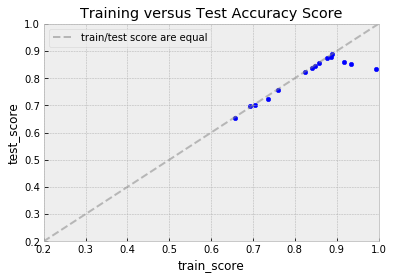

In [24]:
# plot the training versus test score of all 20 models trained
_ = result.plot('train_score','test_score', kind='scatter')
_ = plt.xlim(0.2,1)
_ = plt.ylim(0.2,1)
_ = plt.plot([0,1], [0,1], ls="--", alpha=0.5, c='gray', label='train/test score are equal')
_ = plt.legend()
_ = plt.title('Training versus Test Accuracy Score')

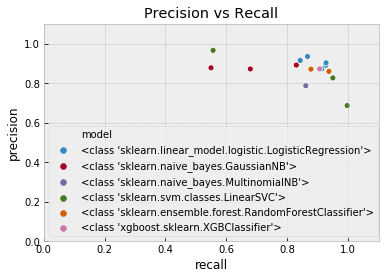

In [25]:
ax = sns.scatterplot(x='recall', y='precision',
              hue="model",
              data=result)

_ = plt.xlim(0,1.1)
_ = plt.ylim(0,1.1)
_ = plt.title('Precision vs Recall')

- It looks like logistic regression seems to have models with the highest precision and recall. 
- Training and test scores are generally similar, except for a few models that look overfit due to the higher train accuracy

In [29]:
result.reset_index(drop=True, inplace=True)
result.sort_values('f1_score', ascending=False)

,test_size,random_state,no_of_features,scaling,NLP_method,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,params
6,0.1,12,305,None,word_embedding,<class 'sklearn.linear_model.logistic.Logistic...,None,0.887310,0.888210,2251,524,380,4867,0.915022,0.902801,0.927578,"[[-0.4139886588958645, 1.10023188521442, -0.50...",NaN
0,0.1,12,791,None,BOW,<class 'sklearn.linear_model.logistic.Logistic...,NaN,0.877213,0.887047,2174,601,384,4863,0.908038,0.890007,0.926815,"[[-0.5062356825121271, -0.9584804122520644, 1....",NaN
7,0.1,12,305,None,word_embedding,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.873473,0.876132,2459,316,699,4548,0.899614,0.935033,0.866781,"[[0.09242812703130801, 0.9057244399812722, -0....",NaN
5,0.1,12,791,None,BOW,<class 'sklearn.ensemble.forest.RandomForestCl...,NaN,0.859013,0.918308,1974,801,330,4917,0.896854,0.859916,0.937107,"[0.0007764871600313499, 0.0001280678072067193,...","{'n_estimators': 500, 'min_samples_split': 10,..."
10,0.1,12,105,None,SVD,<class 'sklearn.linear_model.logistic.Logistic...,None,0.856021,0.858514,2072,703,452,4795,0.892508,0.872135,0.913856,"[[3.104756420826476, -10.560782152568095, 20.9...",NaN
14,0.1,12,105,None,SVD,<class 'xgboost.sklearn.XGBClassifier'>,NaN,0.851783,0.934804,2077,698,491,4756,0.888889,0.872021,0.906423,"[0.0064113345, 0.073563255, 0.111385025, 0.005...",{}
13,0.1,12,105,None,SVD,<class 'sklearn.svm.classes.LinearSVC'>,NaN,0.836824,0.840854,1728,1047,262,4985,0.883944,0.826426,0.950067,"[[0.18216935032069842, -3.0962481405509332, 5....",{}
11,0.1,12,105,None,SVD,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.846048,0.847240,2365,410,825,4422,0.877468,0.915149,0.842767,"[[3.4589649422649615, -10.537341506629696, 21....",NaN
4,0.1,12,791,None,BOW,<class 'sklearn.ensemble.forest.RandomForestCl...,NaN,0.835079,0.994460,2092,683,640,4607,0.874442,0.870888,0.878026,"[0.0012925597139021145, 0.0003485059182544838,...",{}
1,0.1,12,791,None,BOW,<class 'sklearn.naive_bayes.GaussianNB'>,NaN,0.822862,0.824275,2246,529,892,4355,0.859737,0.891687,0.829998,None,{}


In [32]:
# Get the top five best performing models (based on f1 score)
best_models = result.sort_values('f1_score', ascending=False).head()
best_models.head()

,test_size,random_state,no_of_features,scaling,NLP_method,model,class_weight,test_score,train_score,tn,fp,fn,tp,f1_score,precision,recall,feature_importances,params
6,0.1,12,305,None,word_embedding,<class 'sklearn.linear_model.logistic.Logistic...,None,0.887310,0.888210,2251,524,380,4867,0.915022,0.902801,0.927578,"[[-0.4139886588958645, 1.10023188521442, -0.50...",NaN
0,0.1,12,791,None,BOW,<class 'sklearn.linear_model.logistic.Logistic...,NaN,0.877213,0.887047,2174,601,384,4863,0.908038,0.890007,0.926815,"[[-0.5062356825121271, -0.9584804122520644, 1....",NaN
7,0.1,12,305,None,word_embedding,<class 'sklearn.linear_model.logistic.Logistic...,balanced,0.873473,0.876132,2459,316,699,4548,0.899614,0.935033,0.866781,"[[0.09242812703130801, 0.9057244399812722, -0....",NaN
5,0.1,12,791,None,BOW,<class 'sklearn.ensemble.forest.RandomForestCl...,NaN,0.859013,0.918308,1974,801,330,4917,0.896854,0.859916,0.937107,"[0.0007764871600313499, 0.0001280678072067193,...","{'n_estimators': 500, 'min_samples_split': 10,..."
10,0.1,12,105,None,SVD,<class 'sklearn.linear_model.logistic.Logistic...,None,0.856021,0.858514,2072,703,452,4795,0.892508,0.872135,0.913856,"[[3.104756420826476, -10.560782152568095, 20.9...",NaN


In [35]:
# look at the performance metrics for the best 5 models
best_metrics = best_models[['NLP_method', 'model','test_score','train_score','precision','recall','f1_score']].reset_index(drop=True)


In [41]:
best_metrics['model'][0:5] = ['Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Random Forest Classifier', 'Logisitic Regression']

/home/gksullan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
best_metrics.head()

,NLP_method,model,test_score,train_score,precision,recall,f1_score
0,word_embedding,Logistic Regression,0.887310,0.888210,0.902801,0.927578,0.915022
1,BOW,Logistic Regression,0.877213,0.887047,0.890007,0.926815,0.908038
2,word_embedding,Logistic Regression,0.873473,0.876132,0.935033,0.866781,0.899614
3,BOW,Random Forest Classifier,0.859013,0.918308,0.859916,0.937107,0.896854
4,SVD,Logisitic Regression,0.856021,0.858514,0.872135,0.913856,0.892508


- It looks like logistic regression is the best performing model for this dataset
- In terms of NLP approaches, the word embedding method perfomed the best. However, the BOW method came in a close second. 
- The BOW approach takes less computing resources during NLP preprocessing, but the resultant dimensionality of the data can make training ML models slow. 
- In contrast, the word embedding using spacy takes more time in the NLP step, but yields a fixed 300-dimension vector that makes training of ML models generally faster than BOW

In [39]:
# save hyperparameters in a final hyperparameter table for future reference
best_models.to_pickle('data/hyperparameter_tables/final_hyperparameters.pkl')
best_models.to_csv('data/hyperparameter_tables/final_hyperparameters.csv')